In [1]:
import matplotlib.pyplot as plt
import numpy as np
import zipfile
from PIL import Image
import cv2
import os

### Path to zip folder
zip_path = "C:/Users/Sven Jacob/Downloads/obj_Validation_data.zip"

img_folder = "obj_Validation_data/"

with zipfile.ZipFile(zip_path, 'r') as zip_file:
    file_names = zip_file.namelist()
    print(file_names)
    png_files = [f for f in file_names if f.lower().endswith(".png")]
    png_files = np.sort(png_files)
    #print(png_files)
    frames = []
    for png in png_files:
        with zip_file.open(png) as file:
            image_bytes = file.read()
            image_array = np.frombuffer(image_bytes, dtype=np.uint8)
            image = cv2.imdecode(image_array, cv2.IMREAD_GRAYSCALE)
            frames.append(image)

['obj_Validation_data/', 'obj_Validation_data/frame_000049.PNG', 'obj_Validation_data/frame_000049.txt', 'obj_Validation_data/frame_000050.PNG', 'obj_Validation_data/frame_000050.txt', 'obj_Validation_data/frame_000051.PNG', 'obj_Validation_data/frame_000051.txt', 'obj_Validation_data/frame_000052.PNG', 'obj_Validation_data/frame_000052.txt', 'obj_Validation_data/frame_000053.PNG', 'obj_Validation_data/frame_000053.txt', 'obj_Validation_data/frame_000054.PNG', 'obj_Validation_data/frame_000054.txt', 'obj_Validation_data/frame_000055.PNG', 'obj_Validation_data/frame_000055.txt', 'obj_Validation_data/frame_000056.PNG', 'obj_Validation_data/frame_000056.txt', 'obj_Validation_data/frame_000057.PNG', 'obj_Validation_data/frame_000057.txt', 'obj_Validation_data/frame_000058.PNG', 'obj_Validation_data/frame_000058.txt', 'obj_Validation_data/frame_000059.PNG', 'obj_Validation_data/frame_000059.txt', 'obj_Validation_data/frame_000060.PNG', 'obj_Validation_data/frame_000060.txt', 'obj_Validation

In [2]:
frames[0].shape


frames = [ np.rot90(f) for f in frames]

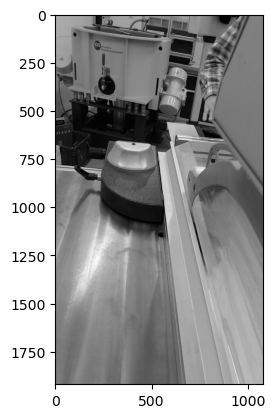

In [3]:
plt.imshow(frames[3],cmap='gray')

In [4]:
M = np.vstack([f.flatten() for f in frames[:135]])
M.shape

(135, 2073600)

In [5]:
U,s,Vt = np.linalg.svd(M,full_matrices=False)

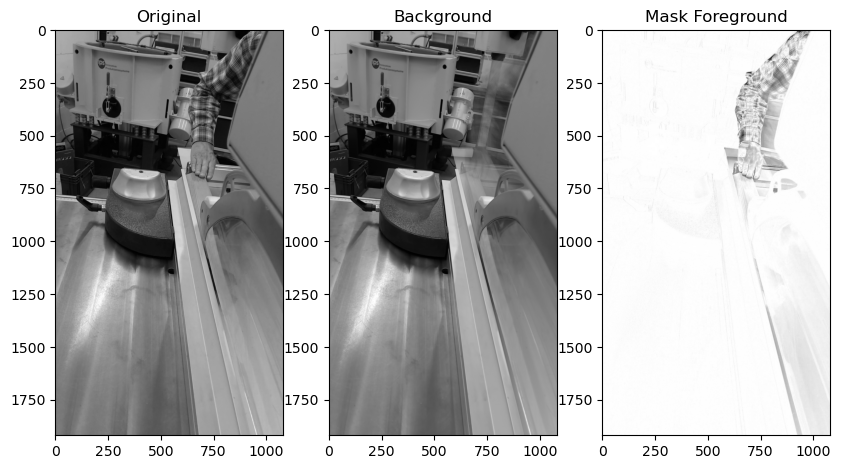

In [6]:
L = 1
S_truncated = np.zeros_like(s)
S_truncated[:L] = s[:L]

frame = 30
M_background = U @ np.diag(S_truncated) @ Vt 
background_frames = M_background.reshape((-1, frames[0].shape[0],frames[0].shape[1]))
fig,ax = plt.subplots(1,3,figsize=(10,10))
ax[1].imshow(background_frames[frame],cmap='gray')
ax[1].set_title('Background')
ax[0].imshow(frames[frame],cmap='gray');
ax[0].set_title('Original')
ax[2].imshow(np.abs(frames[frame]-background_frames[frame]),cmap='binary');
ax[2].set_title('Mask Foreground');

In [27]:
from ultralytics import YOLO
from torchvision import transforms
import torch

# Load a pretrained YOLO11n model
model = YOLO("best.pt")

frame=13

## need to resize it such that w and h is divisible by 32 and has 3 channels
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((960, 512)) # Resize to model's expected input size #(960, 512)
])

img_tensor = transform(frames[frame].copy()).unsqueeze(0) 


img_tensor = torch.stack((img_tensor.squeeze(0),)*3,dim=1)


# Run inference on the source
results = model(img_tensor,show=True)
cv2.waitKey(0)
cv2.destroyAllWindows() # list of Results objects


0: 960x512 3 hands, 16.1ms
Speed: 0.0ms preprocess, 16.1ms inference, 4.0ms postprocess per image at shape (1, 3, 960, 512)
